# Credit Card Approval Prediction Project

In [35]:
#Make the necessary imoprts
import pandas as pd

### Download Data

In [36]:
# Load the dataset into a pandas dataframe.
cc_df = pd.read_csv("data/cc.data", header=None)
print(cc_df.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


### Summary Statistics

In [37]:
# Print summary statistics
cc_df_description = cc_df.describe()
print(cc_df_description)

print('\n')

# Print DataFrame information
cc_df_info = cc_df.info()
print(cc_df_info)

print('\n')

# Inspect missing values in the dataset
# ... YOUR CODE FOR TASK 2 ...
print(cc_df.tail(17))

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

### Train Test Split

In [38]:
# Split the data into 2 parts
from sklearn.model_selection import train_test_split
import numpy as np

# Drop the features 11 and 13
cc_df = cc_df.drop([11,13], axis=1)

# Split into train and test sets
cc_df_train, cc_df_test = train_test_split(cc_df, test_size=0.33, random_state=42)


0     8
1     5
2     0
3     6
4     6
5     7
6     7
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     4
1     7
2     0
3     0
4     0
5     2
6     2
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


/var/folders/rv/_0h726fn3sx8dldgsbxjxv_h0000gn/T/ipykernel_94518/2189450343.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc_df_train.fillna(cc_df_train.mean(), inplace=True)
/var/folders/rv/_0h726fn3sx8dldgsbxjxv_h0000gn/T/ipykernel_94518/2189450343.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc_df_test.fillna(cc_df_train.mean(), inplace=True)


### Cleaning Missing Values
#### Numeric Missing Values

In [ ]:
# Drop NaN values from the dataset
# Replace the '?'s with NaN in the train and test sets
cc_df_train = cc_df_train.replace('?', np.NaN)
cc_df_test = cc_df_test.replace('?', np.NaN)

# Impute the missing values with mean imputation
# Impute the missing values with mean imputation
cc_df_train.fillna(cc_df_train.mean(), inplace=True)
cc_df_test.fillna(cc_df_train.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_df_train.isnull().sum())
print(cc_df_test.isnull().sum())

#### Non-numeric Missing Values

In [39]:
# Iputing missing values for non numeric data
# Iterate over each column of cc_df_train
for col in cc_df_train:
    # Check if the column is of object type
    if cc_df_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_df_train = cc_df_train.fillna(cc_df_train[col].value_counts().index[0])
        cc_df_test = cc_df_test.fillna(cc_df_train[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
# ... YOUR CODE FOR TASK 6 ...
print(cc_df_train.isnull().sum())
print(cc_df_test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


### Data Preprocessing

In [40]:
# Convert the categorical features in the train and test sets independently
cc_df_train = pd.get_dummies(cc_df_train)
cc_df_test = pd.get_dummies(cc_df_test)

# Reindex the columns of the test set aligning with the train set
cc_df_test = cc_df_test.reindex(columns=cc_df_train.columns, fill_value=0)

In [41]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_df_train.iloc[:, :-1].values, cc_df_train.iloc[:, [-1]].values
X_test, y_test = cc_df_test.iloc[:, :-1].values, cc_df_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

### Logistic Regression Model

In [42]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

/Users/markheilner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  1.0


array([[103,   0],
       [  0, 125]])

### Evaluating Performance

In [44]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [.01,.001,.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

### Hyperparameter Tuning

In [46]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test, y_test))

/Users/markheilner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/markheilner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/markheilner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/markheilner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when 

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  1.0


/Users/markheilner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


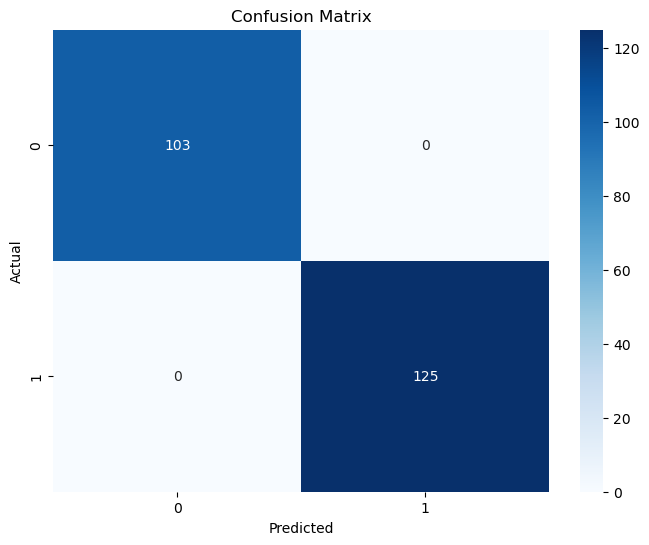

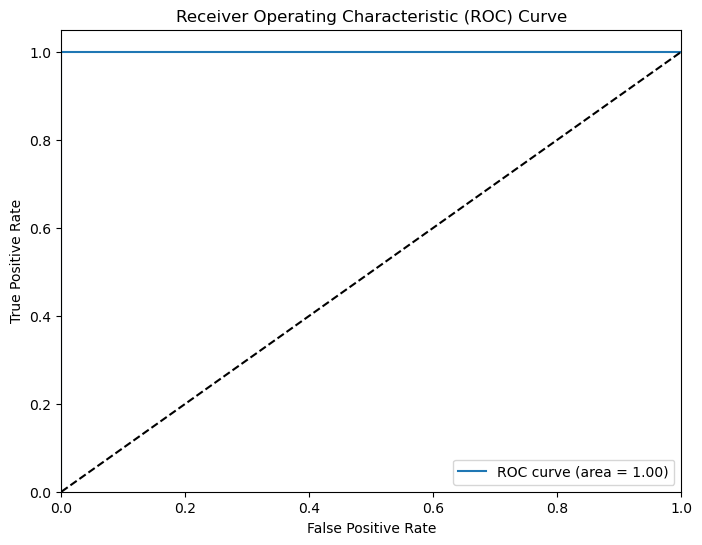

In [47]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create an ROC curve
y_pred_proba = logreg.predict_proba(rescaledX_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
